# 📥 Modul 1: Pemuatan Dataset
Modul ini memuat file `data_planetnasa.csv` dari sistem lokal, memfilter metadata dari baris awal, dan memverifikasi apakah kolom-kolom penting tersedia di dalam dataset.


In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

try:
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]

    # Coba skip metadata
    df = pd.read_csv(filename, comment='#')  # atau skiprows=56 misalnya

    print("✅ Kolom yang tersedia:")
    print(df.columns.tolist())

    # Kolom wajib
    required_columns = ['pl_bmasse', 'pl_rade', 'pl_orbper', 'st_teff', 'st_rad',
                        'pl_name', 'hostname', 'disc_year', 'discoverymethod', 'sy_dist']
    missing_cols = [col for col in required_columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Kolom berikut tidak ditemukan: {missing_cols}")

    print("✅ Data berhasil dimuat. Berikut contoh data:")
    display(df.head())
except Exception as e:
    print(f"❌ Terjadi kesalahan saat memuat data: {e}")





Saving data_planetnasa.csv to data_planetnasa.csv
✅ Kolom yang tersedia:
['rowid', 'pl_name', 'hostname', 'pl_letter', 'hd_name', 'hip_name', 'tic_id', 'gaia_id', 'sy_snum', 'sy_pnum', 'sy_mnum', 'cb_flag', 'discoverymethod', 'disc_year', 'disc_refname', 'disc_pubdate', 'disc_locale', 'disc_facility', 'disc_telescope', 'disc_instrument', 'rv_flag', 'pul_flag', 'ptv_flag', 'tran_flag', 'ast_flag', 'obm_flag', 'micro_flag', 'etv_flag', 'ima_flag', 'dkin_flag', 'pl_controv_flag', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbper_reflink', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_orbsmax_reflink', 'pl_angsep', 'pl_angseperr1', 'pl_angseperr2', 'pl_angseplim', 'pl_angsep_reflink', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_rade_reflink', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_radj_reflink', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmasse_reflink', 'pl_bmassj', 'pl_bmassjerr1',

,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,sy_snum,sy_pnum,...,sy_kepmagerr1,sy_kepmagerr2,sy_kepmag_reflink,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,2,1,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,2.0,1.0,2.0,0.0,0.0,0.0,0.0
1,2,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,3,14 And b,14 And,b,HD 221345,HIP 116076,TIC 333225860,Gaia DR2 1920113512486282240,1,1,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,4,14 Her b,14 Her,b,HD 145675,HIP 79248,TIC 219483057,Gaia DR2 1385293808145621504,1,2,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1.0,4.0,1.0,0.0,0.0,0.0
4,5,16 Cyg B b,16 Cyg B,b,HD 186427,HIP 96901,TIC 27533327,Gaia DR2 2135550755683407232,3,1,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1.0,4.0,3.0,0.0,0.0,0.0


# 🧹 Modul 2: Pembersihan Data
Menghapus baris yang memiliki nilai kosong pada fitur penting seperti massa planet, radius, periode orbit, dan parameter bintang. Juga mengubah tipe data ke numerik agar siap untuk analisis lebih lanjut.


In [34]:
# Modul 2: Data Cleaning
try:
    key_features = ['pl_bmasse', 'pl_rade', 'pl_orbper', 'st_teff', 'st_rad']
    initial_count = df.shape[0]
    df_clean = df.dropna(subset=key_features)
    cleaned_count = df_clean.shape[0]
    print(f"Baris sebelum cleaning: {initial_count}, setelah cleaning: {cleaned_count}")

    for col in key_features:
        df_clean.loc[:, col] = pd.to_numeric(df_clean[col], errors='coerce')

    print("Tipe data setelah konversi:")
    print(df_clean[key_features].dtypes)

except Exception as e:
    print(f"Terjadi kesalahan saat cleaning data: {e}")



Baris sebelum cleaning: 5926, setelah cleaning: 5530
Tipe data setelah konversi:
pl_bmasse    float64
pl_rade      float64
pl_orbper    float64
st_teff      float64
st_rad       float64
dtype: object


# ⚖️ Modul 3: Normalisasi Data
Melakukan transformasi Min-Max pada fitur numerik agar semua nilai berada dalam rentang 0–1. Ini penting untuk menjaga konsistensi dalam perhitungan jarak dan model Machine Learning.


In [35]:
# Modul 3: Transformasi Fitur Numerik
from sklearn.preprocessing import StandardScaler

try:
    scaler = StandardScaler()
    features_to_scale = ['pl_bmasse', 'pl_rade', 'pl_orbper', 'st_teff', 'st_rad']
    df_scaled = df_clean.copy()
    df_scaled[features_to_scale] = scaler.fit_transform(df_clean[features_to_scale])

    print("Contoh data setelah normalisasi StandardScaler:")
    display(df_scaled[features_to_scale].head())

except Exception as e:
    print(f"Terjadi kesalahan saat transformasi fitur: {e}")



Contoh data setelah normalisasi StandardScaler:


,pl_bmasse,pl_rade,pl_orbper,st_teff,st_rad
0,4.845784,1.336251,-0.013986,-0.376722,3.039951
1,4.603504,1.355921,-0.013950,-0.867006,7.021782
2,0.861474,1.513281,-0.014011,-0.366338,2.490990
3,2.365505,1.414931,-0.013719,-0.032559,-0.147004
4,0.266090,1.591960,-0.013898,0.273034,-0.097324


# 🌍 Modul 4: Skor Kemiripan dengan Bumi
Menghitung jarak Euclidean dari setiap exoplanet ke nilai referensi Bumi berdasarkan fitur terpilih. Semakin kecil jaraknya, semakin mirip planet tersebut dengan Bumi. Kemudian dikonversi menjadi skor kemiripan.


In [38]:
# Modul 4: Perhitungan Kemiripan dengan Bumi menggunakan Earth Similarity Index (ESI)
df_clean = df_clean.copy()  # tambahkan ini satu kali di awal modul
df_clean.loc[:, 'similarity_score'] = df_clean.apply(calculate_esi, axis=1)

try:
    # Referensi Bumi
    earth = {
        'pl_bmasse': 1.0,
        'pl_rade': 1.0,
        'pl_orbper': 365.25,
        'st_teff': 5778,
        'st_rad': 1.0
    }

    # Bobot (bisa dimodifikasi)
    weights = {
        'pl_bmasse': 0.57,
        'pl_rade': 0.57,
        'pl_orbper': 0.3,
        'st_teff': 5.58,
        'st_rad': 0.5
    }

    def esi_single(feature, value):
        x0 = earth[feature]
        w = weights[feature]
        esi = (1 - abs((value - x0) / (value + x0))) ** w
        return esi

    def calculate_esi(row):
        esis = [esi_single(f, row[f]) for f in features_to_scale]
        return np.prod(esis)  # total ESI = perkalian semua fitur ESI

    df_clean['similarity_score'] = df_clean.apply(calculate_esi, axis=1)
    df_scaled_sorted = df_clean.sort_values(by='similarity_score', ascending=False)

    print("Top 10 exoplanet paling mirip Bumi (ESI):")
    display(df_scaled_sorted[['pl_name', 'similarity_score']].head(10))

except Exception as e:
    print(f"Terjadi kesalahan saat menghitung ESI: {e}")




Top 10 exoplanet paling mirip Bumi (ESI):


,pl_name,similarity_score
2499,Kepler-132 e,0.546275
4076,Kepler-452 b,0.529430
2238,Kepler-1126 c,0.527127
2890,Kepler-1605 b,0.498431
2633,Kepler-1417 b,0.488181
2318,Kepler-1185 b,0.480055
3941,Kepler-384 c,0.472165
2754,Kepler-1505 b,0.471818
2406,Kepler-1253 b,0.457933
4408,Kepler-69 c,0.449673


# 🔬 Modul 5: Analisis Statistik dan Clustering
Melakukan analisis korelasi antar fitur, distribusi massa planet, dan clustering menggunakan KMeans serta PCA untuk visualisasi. Juga termasuk uji korelasi Pearson dan normalitas Shapiro-Wilk.


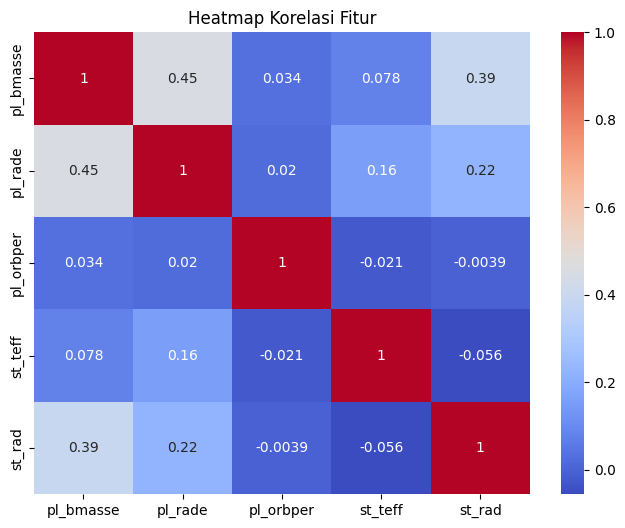

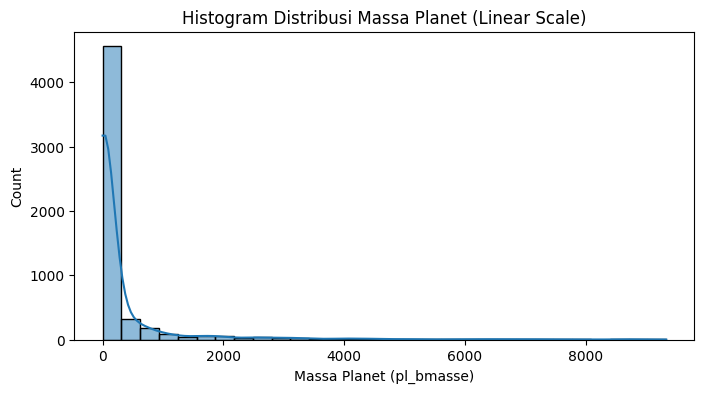

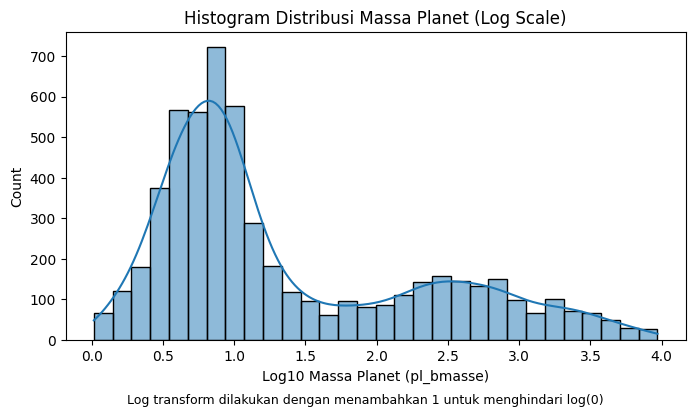

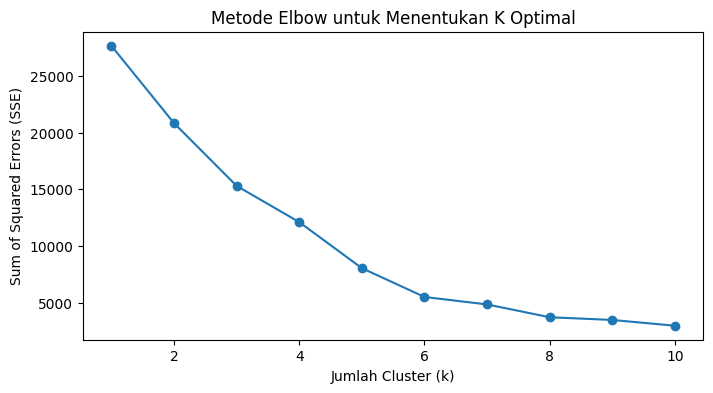

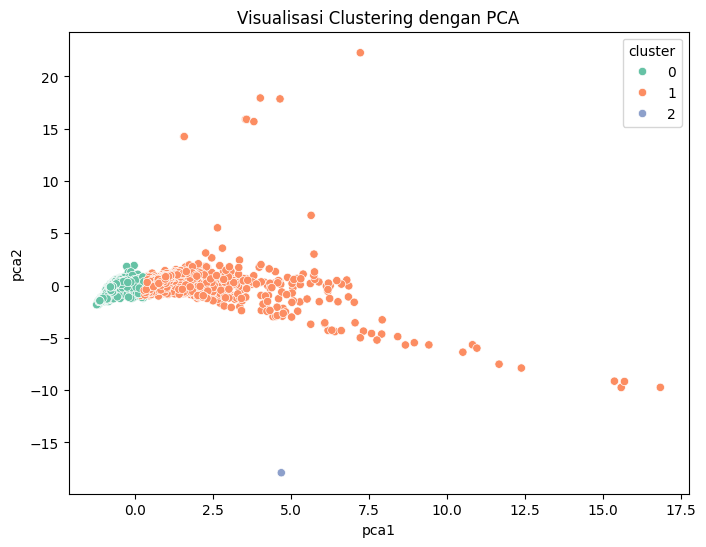

Korelasi Pearson antara fitur dan similarity_score (ESI):
pl_bmasse: korelasi = -0.331, p-value = 6.651e-142
pl_rade: korelasi = -0.646, p-value = 0.000e+00
pl_orbper: korelasi = -0.015, p-value = 2.704e-01
st_teff: korelasi = 0.122, p-value = 7.606e-20
st_rad: korelasi = -0.136, p-value = 2.797e-24
Uji Shapiro-Wilk untuk pl_bmasse: statistik=0.364, p-value=5.736e-88


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5530.
  res = hypotest_fun_out(*samples, **kwds)


In [40]:
# Modul 5: Analisis Ilmiah
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import pearsonr, shapiro

try:
    # Korelasi antar fitur
    corr = df_clean[features_to_scale].corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Heatmap Korelasi Fitur')
    plt.show()

    # Histogram massa planet
    plt.figure(figsize=(8,4))
    sns.histplot(df_clean['pl_bmasse'], bins=30, kde=True)
    plt.title('Histogram Distribusi Massa Planet (Linear Scale)')
    plt.xlabel('Massa Planet (pl_bmasse)')
    plt.show()

    # Histogram log(massa planet)
    plt.figure(figsize=(8,4))
    sns.histplot(np.log10(df_clean['pl_bmasse'] + 1), bins=30, kde=True)
    plt.title('Histogram Distribusi Massa Planet (Log Scale)')
    plt.xlabel('Log10 Massa Planet (pl_bmasse)')
    plt.figtext(0.5, -0.05, 'Log transform dilakukan dengan menambahkan 1 untuk menghindari log(0)', ha='center', fontsize=9)
    plt.show()

    # Clustering menggunakan data hasil scaling (bukan untuk similarity)
    X = df_scaled[features_to_scale]
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)

    # Plot Elbow Method
    plt.figure(figsize=(8,4))
    plt.plot(range(1, 11), sse, marker='o')
    plt.title('Metode Elbow untuk Menentukan K Optimal')
    plt.xlabel('Jumlah Cluster (k)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.show()

    # Clustering dan PCA
    optimal_k = 3
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    df_scaled['cluster'] = kmeans.fit_predict(X)

    pca = PCA(n_components=2)
    components = pca.fit_transform(X)
    df_scaled['pca1'] = components[:, 0]
    df_scaled['pca2'] = components[:, 1]

    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df_scaled, x='pca1', y='pca2', hue='cluster', palette='Set2')
    plt.title('Visualisasi Clustering dengan PCA')
    plt.show()

    # Korelasi Pearson terhadap similarity_score dari ESI (gunakan df_clean)
    print('Korelasi Pearson antara fitur dan similarity_score (ESI):')
    for feature in features_to_scale:
        corr_coef, p_value = pearsonr(df_clean[feature], df_clean['similarity_score'])
        print(f"{feature}: korelasi = {corr_coef:.3f}, p-value = {p_value:.3e}")

    # Uji normalitas terhadap distribusi massa planet
    stat, p = shapiro(df_clean['pl_bmasse'].dropna())
    print(f"Uji Shapiro-Wilk untuk pl_bmasse: statistik={stat:.3f}, p-value={p:.3e}")

except Exception as e:
    print(f"❌ Terjadi kesalahan saat analisis ilmiah: {e}")


# 📈 Modul 6: Visualisasi Hasil
Menampilkan grafik seperti bar chart planet paling mirip Bumi, heatmap korelasi fitur, histogram log dan linear massa planet, scatter plot clustering PCA, dan radar chart planet terbaik.


/tmp/ipython-input-41-533773943.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='similarity_score', y='pl_name', data=top10, palette='viridis')


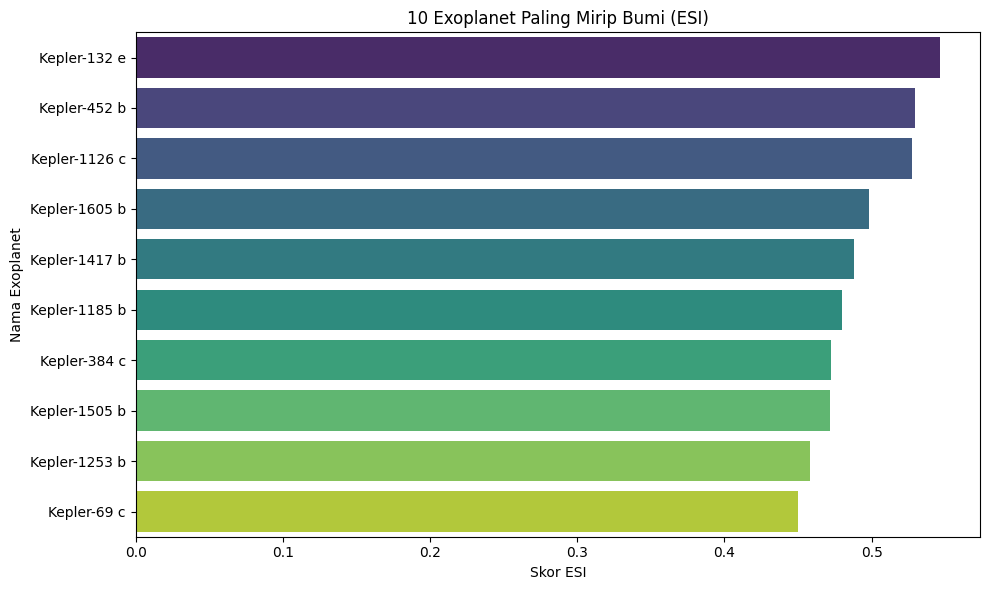

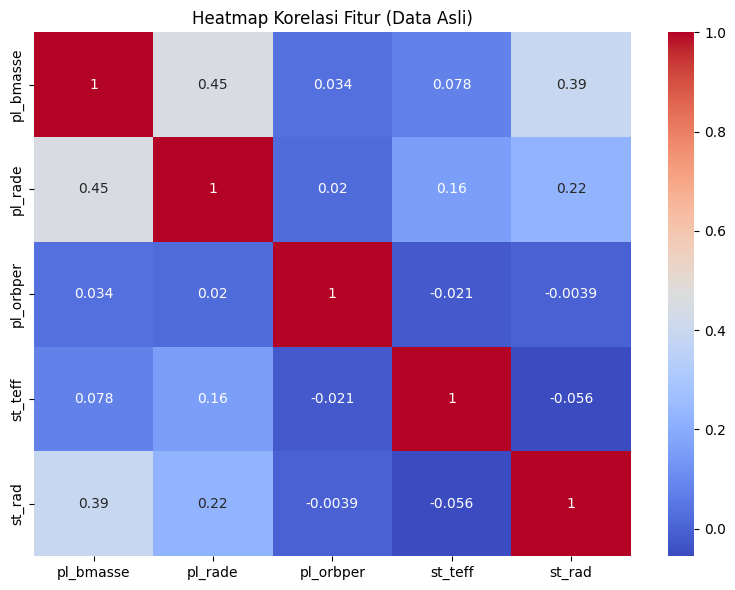

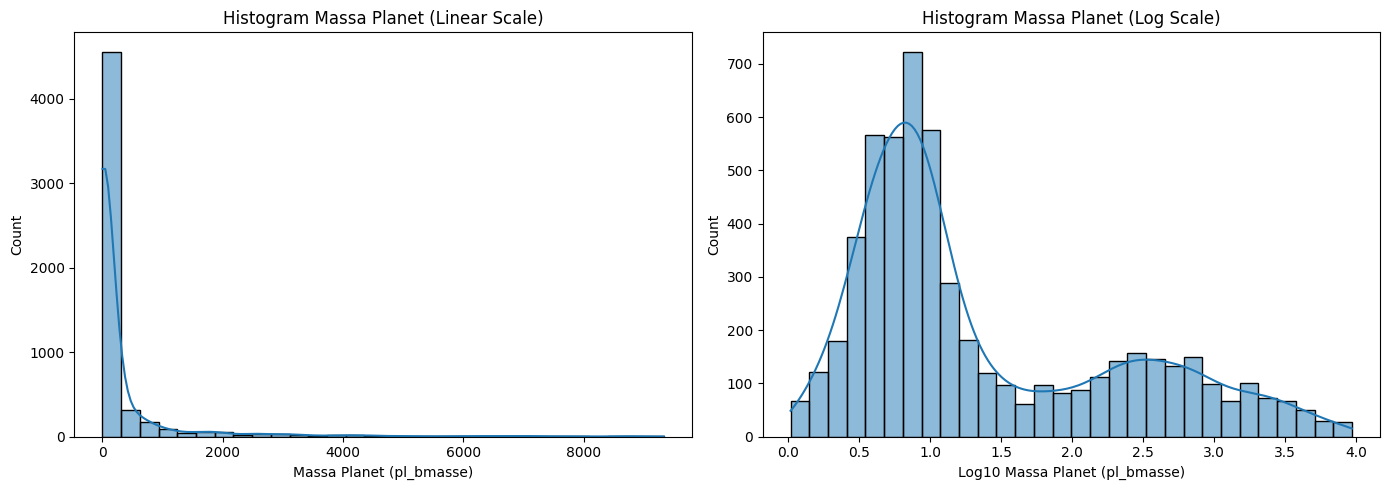

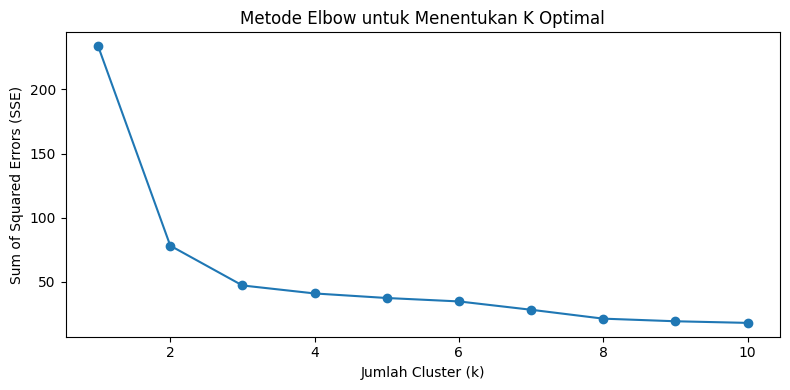

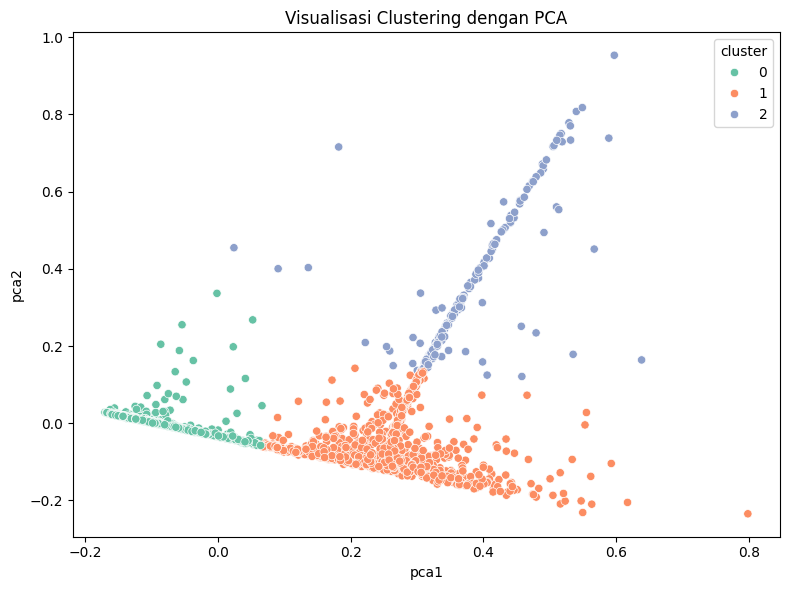

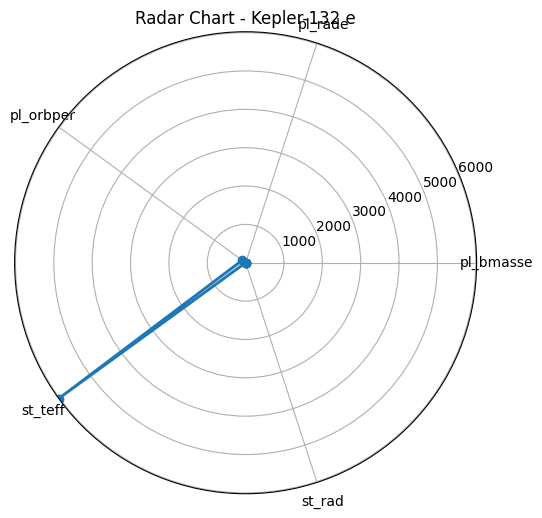

In [41]:
# Modul 6: Visualisasi ESI dan Analisis Data
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

try:
    # Top 10 berdasarkan ESI
    top10 = df_scaled_sorted.head(10)

    # Bar chart: Top 10 exoplanet mirip Bumi
    plt.figure(figsize=(10,6))
    sns.barplot(x='similarity_score', y='pl_name', data=top10, palette='viridis')
    plt.title('10 Exoplanet Paling Mirip Bumi (ESI)')
    plt.xlabel('Skor ESI')
    plt.ylabel('Nama Exoplanet')
    plt.tight_layout()
    plt.show()

    # Heatmap korelasi fitur asli
    plt.figure(figsize=(8,6))
    sns.heatmap(df_clean[features_to_scale].corr(), annot=True, cmap='coolwarm')
    plt.title('Heatmap Korelasi Fitur (Data Asli)')
    plt.tight_layout()
    plt.show()

    # Histogram massa planet (linear)
    fig, axs = plt.subplots(1,2, figsize=(14,5))
    sns.histplot(df_clean['pl_bmasse'], bins=30, kde=True, ax=axs[0])
    axs[0].set_title('Histogram Massa Planet (Linear Scale)')
    axs[0].set_xlabel('Massa Planet (pl_bmasse)')

    # Histogram massa planet (log)
    sns.histplot(np.log10(df_clean['pl_bmasse'] + 1), bins=30, kde=True, ax=axs[1])
    axs[1].set_title('Histogram Massa Planet (Log Scale)')
    axs[1].set_xlabel('Log10 Massa Planet (pl_bmasse)')
    plt.tight_layout()
    plt.show()

    # Clustering dan PCA dari fitur asli (distandardisasi dulu dengan MinMaxScaler)
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(df_clean[features_to_scale])
    X = pd.DataFrame(X_scaled, columns=features_to_scale)

    # Elbow method untuk tentukan k optimal
    sse = []
    for k in range(1,11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)

    plt.figure(figsize=(8,4))
    plt.plot(range(1,11), sse, marker='o')
    plt.title('Metode Elbow untuk Menentukan K Optimal')
    plt.xlabel('Jumlah Cluster (k)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.tight_layout()
    plt.show()

    # Clustering dan PCA (k=3)
    optimal_k = 3
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    df_clean['cluster'] = kmeans.fit_predict(X)

    pca = PCA(n_components=2)
    components = pca.fit_transform(X)
    df_clean['pca1'] = components[:,0]
    df_clean['pca2'] = components[:,1]

    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df_clean, x='pca1', y='pca2', hue='cluster', palette='Set2')
    plt.title('Visualisasi Clustering dengan PCA')
    plt.tight_layout()
    plt.show()

    # Radar Chart untuk planet paling mirip Bumi
    def radar_chart(data, labels, title):
        angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
        data = np.concatenate((data,[data[0]]))
        angles += angles[:1]
        fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
        ax.plot(angles, data, 'o-', linewidth=2)
        ax.fill(angles, data, alpha=0.25)
        ax.set_thetagrids(np.degrees(angles[:-1]), labels)
        ax.set_title(title)
        ax.set_ylim(0, max(data) + 0.1)
        ax.grid(True)
        plt.show()

    top_planet = top10.iloc[0]
    data_vals = top_planet[features_to_scale].values
    radar_chart(data_vals, features_to_scale, f'Radar Chart - {top_planet.pl_name}')

except Exception as e:
    print(f"❌ Terjadi kesalahan saat visualisasi: {e}")



# 💾 Modul 7: Simpan Output
Menyimpan hasil analisis penting seperti tabel top 10 exoplanet paling mirip Bumi, visualisasi grafik (PNG), dan data lengkap (CSV) ke dalam folder `outputs/`.


In [42]:
# Modul 7: Simpan Output (Final Version untuk ESI)
import os
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

try:
    os.makedirs("outputs", exist_ok=True)

    # Simpan top 10 planet mirip Bumi berdasarkan ESI
    top10 = df_scaled_sorted.head(10)
    top10[['pl_name', 'similarity_score']].to_csv("outputs/top10_planet.csv", index=False)

    # Simpan bar chart
    plt.figure(figsize=(10,6))
    sns.barplot(x='similarity_score', y='pl_name', data=top10, palette='viridis')
    plt.title('10 Exoplanet Paling Mirip Bumi (ESI)')
    plt.xlabel('Skor ESI')
    plt.ylabel('Nama Exoplanet')
    plt.tight_layout()
    plt.savefig("outputs/top10_similarity_barplot.png")
    plt.close()

    # Simpan heatmap korelasi fitur dari df_clean
    plt.figure(figsize=(8,6))
    sns.heatmap(df_clean[features_to_scale].corr(), annot=True, cmap='coolwarm')
    plt.title('Heatmap Korelasi Fitur (Data Asli)')
    plt.tight_layout()
    plt.savefig("outputs/heatmap_korelasi.png")
    plt.close()

    # Simpan histogram massa planet (linear scale)
    plt.figure(figsize=(8,4))
    sns.histplot(df_clean['pl_bmasse'], bins=30, kde=True)
    plt.title('Histogram Massa Planet (Linear)')
    plt.xlabel('Massa Planet (pl_bmasse)')
    plt.tight_layout()
    plt.savefig("outputs/histogram_massa_linear.png")
    plt.close()

    # Simpan histogram massa planet (log scale)
    plt.figure(figsize=(8,4))
    sns.histplot(np.log10(df_clean['pl_bmasse'] + 1), bins=30, kde=True)
    plt.title('Histogram Massa Planet (Log Scale)')
    plt.xlabel('Log10 Massa Planet (pl_bmasse)')
    plt.tight_layout()
    plt.savefig("outputs/histogram_massa_log.png")
    plt.close()

    # Clustering dan PCA dari data asli yang telah diskalakan (X_scaled dari cell 6)
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(df_clean[features_to_scale])
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA

    sse = []
    for k in range(1,11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        sse.append(kmeans.inertia_)

    # Simpan elbow method
    plt.figure(figsize=(8,4))
    plt.plot(range(1,11), sse, marker='o')
    plt.title('Elbow Method untuk KMeans')
    plt.xlabel('Jumlah Cluster (k)')
    plt.ylabel('SSE')
    plt.tight_layout()
    plt.savefig("outputs/elbow_method.png")
    plt.close()

    # PCA dan scatter cluster
    kmeans = KMeans(n_clusters=3, random_state=42)
    df_clean['cluster'] = kmeans.fit_predict(X_scaled)
    pca = PCA(n_components=2)
    components = pca.fit_transform(X_scaled)
    df_clean['pca1'] = components[:,0]
    df_clean['pca2'] = components[:,1]

    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df_clean, x='pca1', y='pca2', hue='cluster', palette='Set2')
    plt.title('Clustering PCA')
    plt.tight_layout()
    plt.savefig("outputs/pca_clustering.png")
    plt.close()

    # Simpan radar chart
    def radar_chart_save(data, labels, title, filename):
        angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
        data = np.concatenate((data,[data[0]]))
        angles += angles[:1]
        fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
        ax.plot(angles, data, 'o-', linewidth=2)
        ax.fill(angles, data, alpha=0.25)
        ax.set_thetagrids(np.degrees(angles[:-1]), labels)
        ax.set_title(title)
        ax.set_ylim(0, max(data) + 0.1)
        ax.grid(True)
        plt.savefig(filename)
        plt.close()

    radar_chart_save(top10.iloc[0][features_to_scale].values, features_to_scale,
                     f'Radar Chart - {top10.iloc[0].pl_name}',
                     f"outputs/radar_chart_{top10.iloc[0].pl_name}.png")

    # Simpan semua dataset hasil akhir
    df_clean.to_csv("outputs/cleaned_data.csv", index=False)
    df_scaled_sorted.to_csv("outputs/full_similarity_result.csv", index=False)

    print("✅ Semua output berhasil disimpan ke folder 'outputs/'")

except Exception as e:
    print(f"❌ Gagal menyimpan output: {e}")




/tmp/ipython-input-42-3970247808.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='similarity_score', y='pl_name', data=top10, palette='viridis')


✅ Semua output berhasil disimpan ke folder 'outputs/'
